In [1]:
# Import measure related functions
from spiketools.measures.spikes import (compute_firing_rate, compute_isis,
                                        compute_cv, compute_fano_factor)
from spiketools.measures.conversions import (convert_times_to_train, convert_train_to_times,
                                             convert_isis_to_times)
from spiketools.measures.trials import (compute_trial_frs, compute_pre_post_rates,
                                        compute_segment_frs, compute_pre_post_averages,
                                        compute_pre_post_diffs)

from spiketools.plts.data import plot_lines
# Import simulation functions
from spiketools.sim import sim_spiketimes

# Import plot functions
from spiketools.plts.spikes import plot_isis
from spiketools.plts.trials import plot_rasters
from fooof.plts import plot_spectra

import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes

import warnings
warnings.filterwarnings("ignore")

from scipy import stats

In [2]:
# folder of the results
#path_files = Path('/home/b1044271/Columbia/Results/PSDs/New_freq_Res/E257')
path_files = Path('/home/b1044271/Columbia/Results/PSDs/Cz/')


# Get names of all subject folder
sbj_folders = list(path_files.iterdir())
sbj_folders = sorted(sbj_folders)[4:]

In [3]:
# a function to generate freq files
def files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file          

In [4]:
# get frequencies for all dimensions (x axis).
path_freqs = Path('/home/b1044271/Columbia/Results/PSDs/Freqs')
f_files = list(path_freqs.iterdir())
f_files = sorted(f_files)

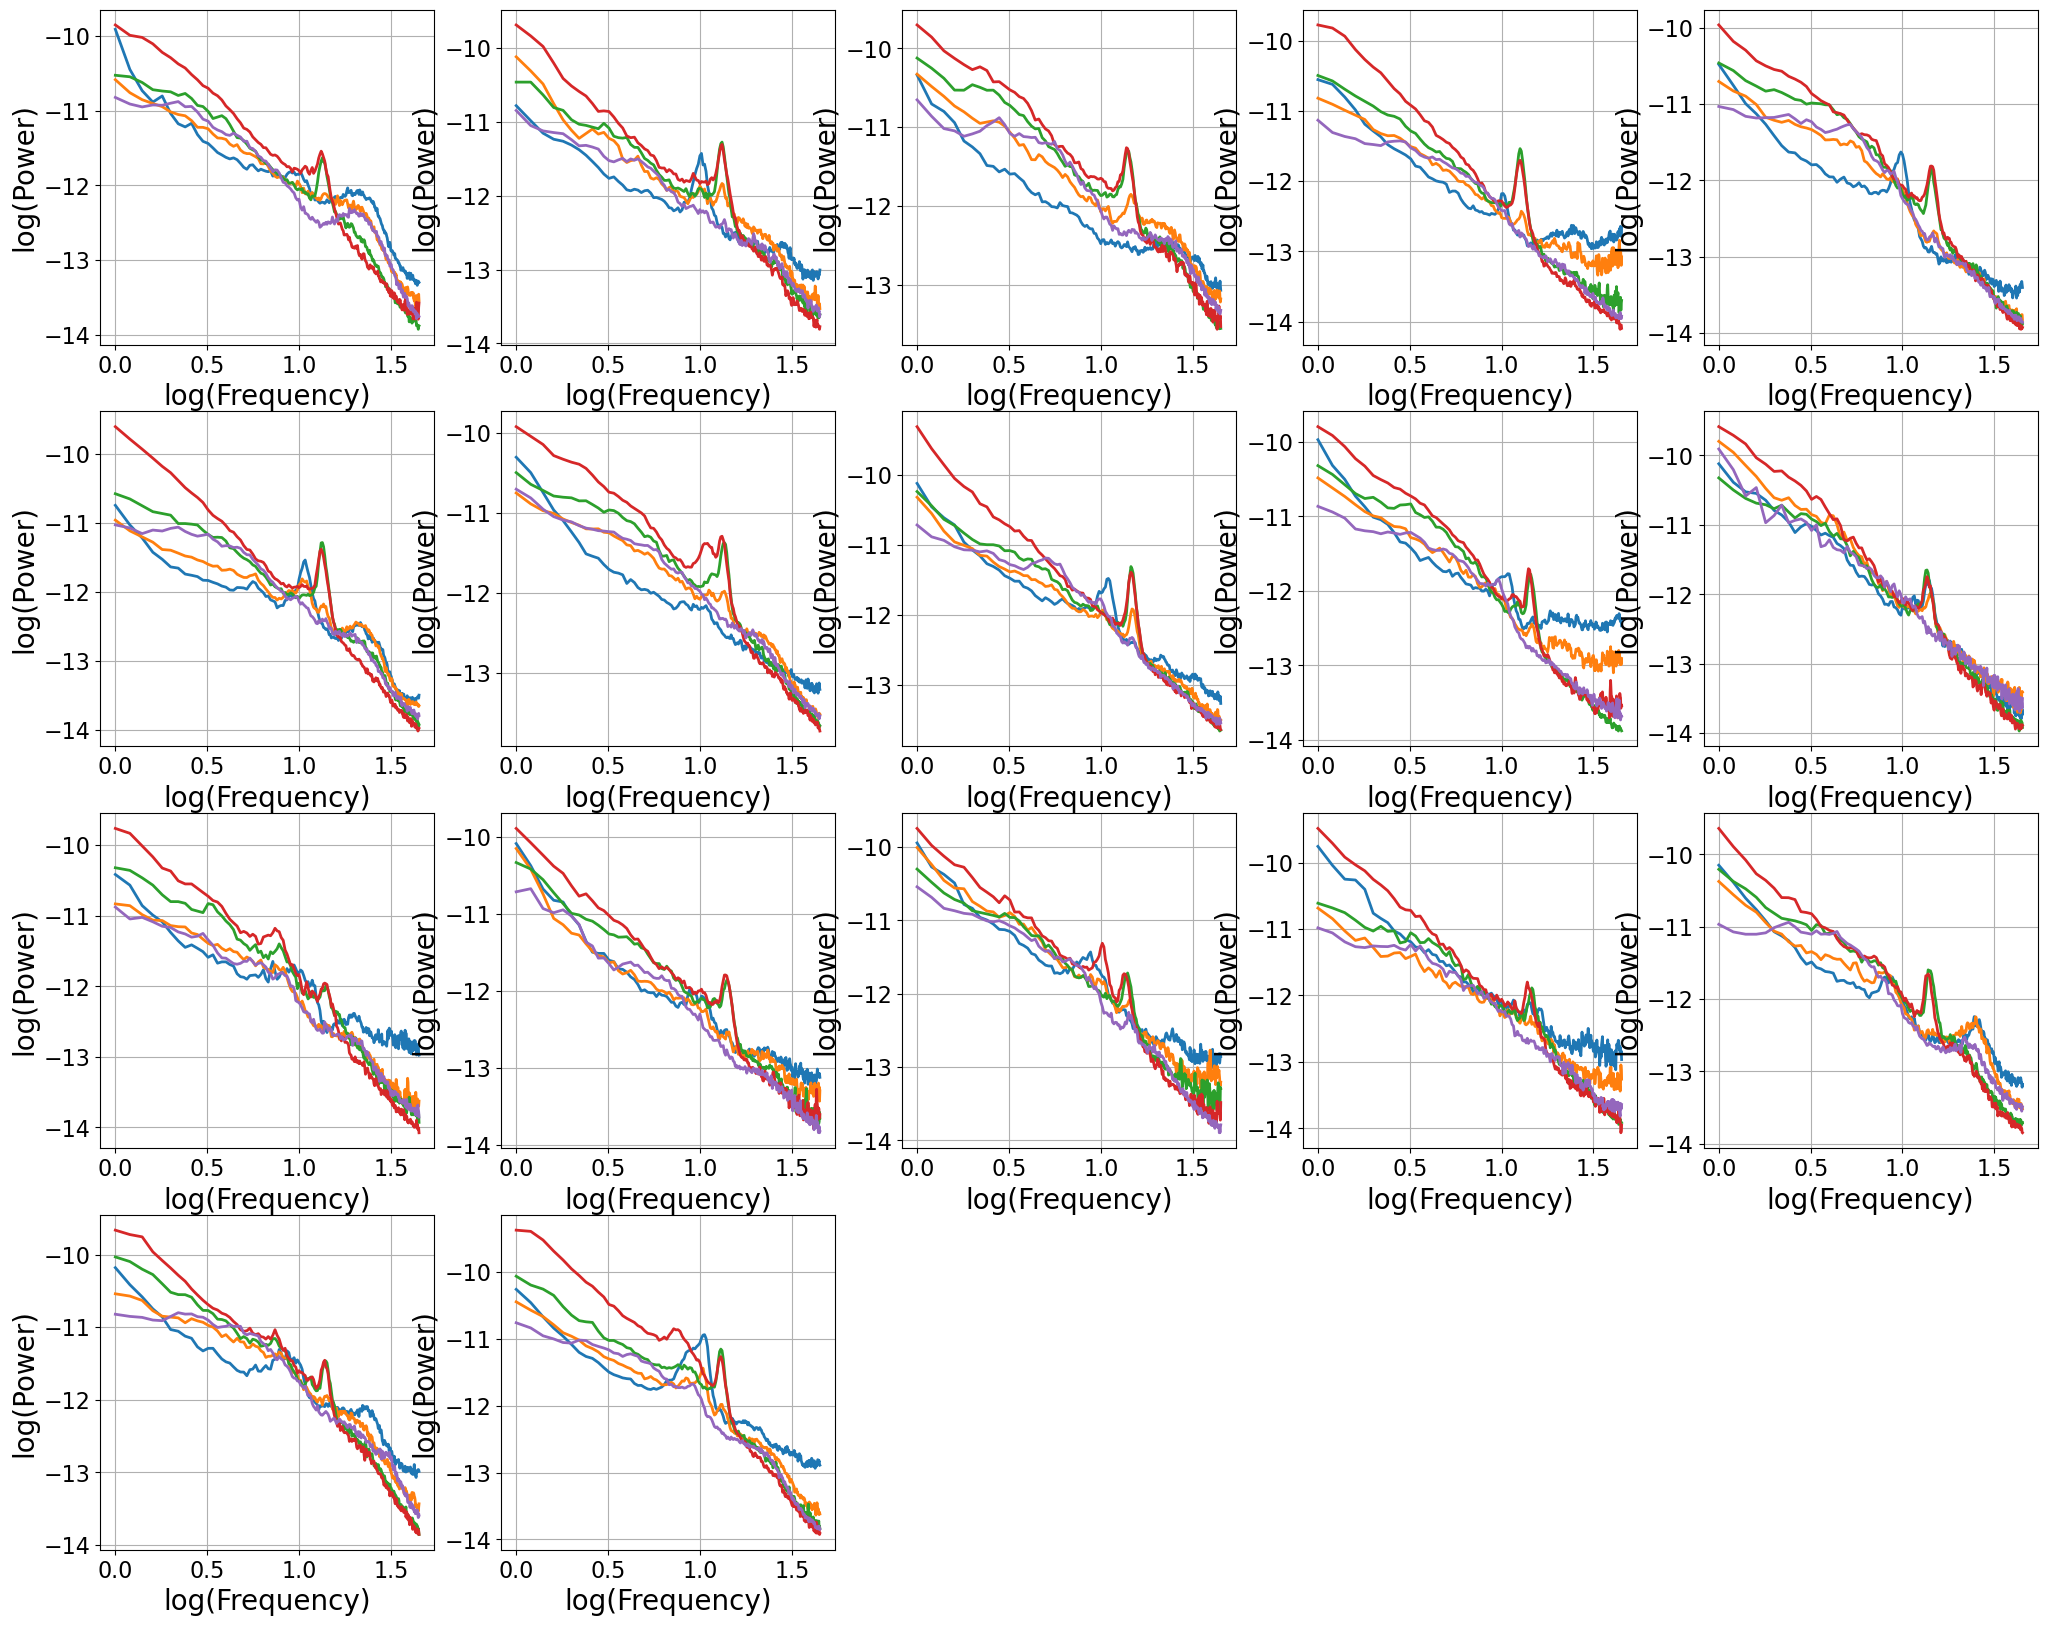

In [5]:
N1_psd={}
N2_psd={}
N3_psd={}
AW_psd={}
RM_psd={}

F_PARAM = 'F45'
T_PARAM = 'T5'
axes = iter(make_axes(17, 5, figsize=(25, 20)))


i = 0
freqs_d = np.load((path_freqs/(T_PARAM + F_PARAM + '_freqres.npy')))
freqs_d=freqs_d[4:]
for subj in sbj_folders:  
    N1s = np.load(path_files / subj / 'N1' / (T_PARAM + '_' + F_PARAM + '.npy'))
    N2s = np.load(path_files / subj /'N2' / (T_PARAM + '_' + F_PARAM + '.npy'))
    N3s = np.load(path_files / subj /'N3' / (T_PARAM + '_' + F_PARAM + '.npy'))
    AWs = np.load(path_files / subj /'AW' / (T_PARAM + '_' + F_PARAM + '.npy'))
    RMs = np.load(path_files / subj /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    
    epoch_no = min([len(N1s),len(N2s),len(N3s),len(AWs),len(RMs)])
    
    N1_psd[i] = np.mean(N1s[np.random.choice(len(N1s), size=epoch_no, replace=False),:],0)
    N2_psd[i] = np.mean(N2s[np.random.choice(len(N2s), size=epoch_no, replace=False),:],0)
    N3_psd[i] = np.mean(N3s[np.random.choice(len(N3s), size=epoch_no, replace=False),:],0)
    AW_psd[i] = np.mean(AWs[np.random.choice(len(AWs), size=epoch_no, replace=False),:],0)
    RM_psd[i] = np.mean(RMs[np.random.choice(len(RMs), size=epoch_no, replace=False),:],0)
    i = i+1
    
      # mean over all subjects per condition
lN1 = list(iter(N1_psd.values())) #convert values to list
lN2 = list(iter(N2_psd.values())) #convert values to list
lN3 = list(iter(N3_psd.values())) #convert values to list
lAW = list(iter(AW_psd.values())) #convert values to list
lRM = list(iter(RM_psd.values())) #convert values to list
    
for S in np.arange(len(lN1)):

    plot_spectra(freqs_d,[lAW[S],lN1[S],lN2[S],lN3[S],
        lRM[S]], log_freqs=True, log_powers=True, ax=next(axes))
 

#plt.savefig("Group_PSDs_Trial2_Cz2.svg", dpi = 600 )

(0.0, 1.65)

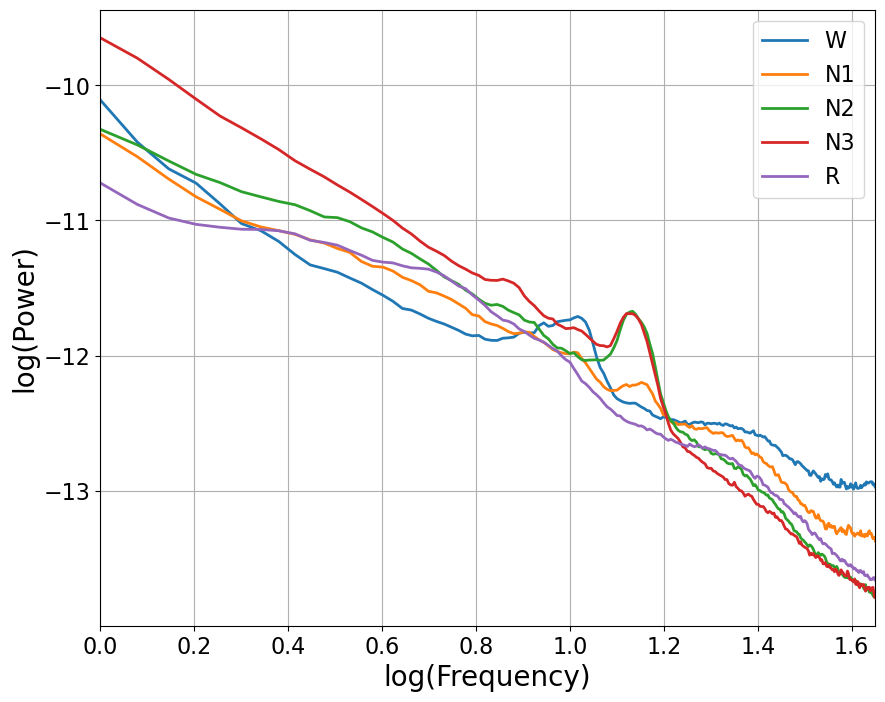

In [12]:
plot_spectra(freqs_d,[np.mean(lAW,axis=0),np.mean(lN1,axis=0),np.mean(lN2,axis=0),np.mean(lN3,axis=0),
        np.mean(lRM,axis=0)], log_freqs=True, log_powers=True, labels =['W','N1','N2','N3','R'])
plt.xlim(0,1.65)

plt.savefig("/home/b1044271/Columbia/Plots/EEG_PSDs.svg", dpi = 600 )


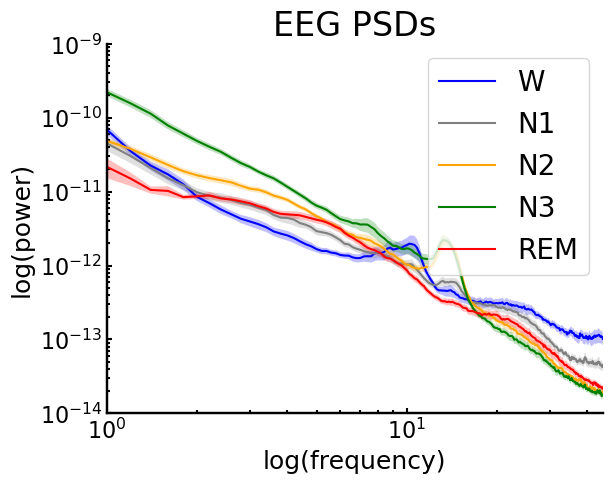

In [10]:
PSDs_Ws = stats.sem(lAW,0, nan_policy = 'omit')
PSDs_Wm = np.nanmean(lAW,axis=0)

PSDs_Rs = stats.sem(lRM,0, nan_policy = 'omit')
PSDs_Rm = np.nanmean(lRM,axis=0)

PSDs_N2s = stats.sem(lN2, nan_policy = 'omit')
PSDs_N2m = np.nanmean(lN2, axis=0)

PSDs_N3s = stats.sem(lN3,0, nan_policy = 'omit')
PSDs_N3m = np.nanmean(lN3,axis=0)

PSDs_N1s = stats.sem(lN1,0, nan_policy = 'omit')
PSDs_N1m = np.nanmean(lN1,axis=0)

plt.plot(freqs_d,np.nanmean(lAW,0),'b',label='W')
plt.fill_between(freqs_d,PSDs_Wm-PSDs_Ws, PSDs_Wm+PSDs_Ws,facecolor='b', alpha=0.25)

plt.plot(freqs_d,np.nanmean(lN1,0), 'grey', label ='N1')
plt.fill_between(freqs_d,PSDs_N1m-PSDs_N1s, PSDs_N1m+PSDs_N1s,facecolor='grey', alpha=0.25)

plt.plot(freqs_d,np.nanmean(lN2,0), 'orange', label='N2')
plt.fill_between(freqs_d,PSDs_N2m-PSDs_N2s, PSDs_N2m+PSDs_N2s,facecolor='orange', alpha=0.25)

plt.plot(freqs_d,np.nanmean(lN3,0), 'green', label='N3')
plt.fill_between(freqs_d,PSDs_N3m-PSDs_N3s, PSDs_N3m+PSDs_N3s,facecolor='green', alpha=0.25)

plt.plot(freqs_d,np.nanmean(lRM,0), 'r', label='REM')
plt.fill_between(freqs_d,PSDs_Rm-PSDs_Rs, PSDs_Rm+PSDs_Rs,facecolor='r', alpha=0.25)



# PLOTTING
plt.title('EEG PSDs', fontsize = 24)
plt.xlabel('log(frequency)', fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.xlim(freqs_d[0],freqs_d[-1])#
plt.ylim(10e-15,10e-10)

plt.ylabel('log(power)', fontsize=18)
plt.xlabel('log(frequency)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/EEG_PSDs_Group_Cz.svg", dpi = 600 )

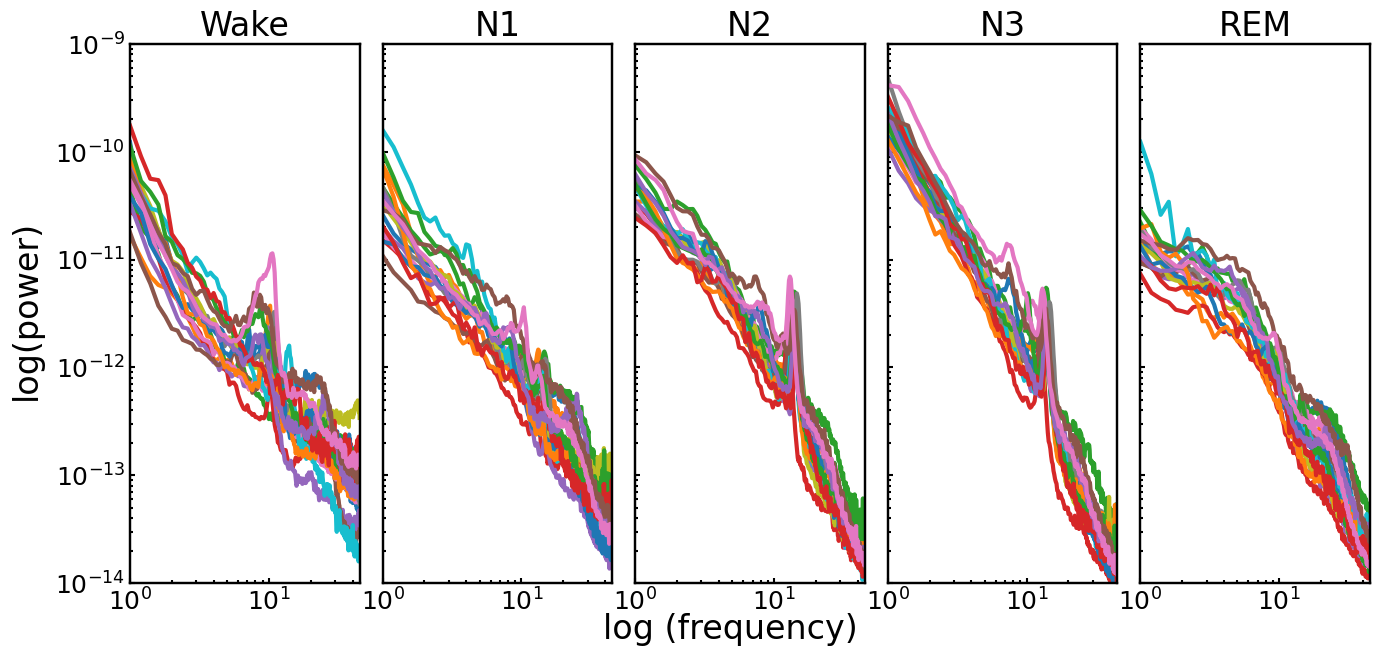

In [38]:
titles =  ['Wake','N1','N2','N3', 'REM']
array_list = [lAW, lN1,lN2, lN3, lRM]

# Plotting
#fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 6)) # create a subplot
fig, ax = plt.subplots(1,5, sharex=True, sharey=True, figsize=(16,7.))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

for i, V in enumerate(array_list):
    
    ax[i].loglog(freqs_d, np.transpose(V),linewidth=3)
    ax[i].set_title(titles[i], fontsize =24)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.xlim(freqs_d[0],freqs_d[-1])#
    plt.ylim(10e-15,10e-10)
    
fig.text(0.5, 0.03, 'log (frequency)', ha='center', fontsize=24)
fig.text(0.05, 0.5, 'log(power)', va='center', rotation='vertical' , fontsize=24)

for axs in ax.flatten():

    axs.spines['top'].set_linewidth(1.75)
    axs.spines['right'].set_linewidth(1.75)
    axs.spines['bottom'].set_linewidth(1.75)
    axs.spines['left'].set_linewidth(1.75)   # Set the linewidth of the left axis line
    axs.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=18)  # Customize tick properties

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/EEG_PSDs_SingleS_Cz.svg", dpi = 600 )
    
#for i, V in enumerate(array_list):
    
 #   ax = fig.add_subplot(1, 5, i+1)
 #   ax.loglog(freqs_d,np.nanmean(V,0)) 
 #   ax.title.set_text(titles[i])
 #   #ax.set_ylim([10e-12 ,10e-9])
 #   ax.set_xlim(freqs_d[0],freqs_d[-1])#
 #   ax.set_ylim(10e-15,10e-10)
    
#fig.text(0.5, 0.04, 'log (frequency)', ha='center', fontsize=24)
#fig.text(0.07, 0.5, 'log(power)', va='center', rotation='vertical' , fontsize=24)
#plt.savefig("/home/b1044271/Columbia/Plots/EEG_PSDs_SingleS_Cz_averaged.svg", dpi = 600 )

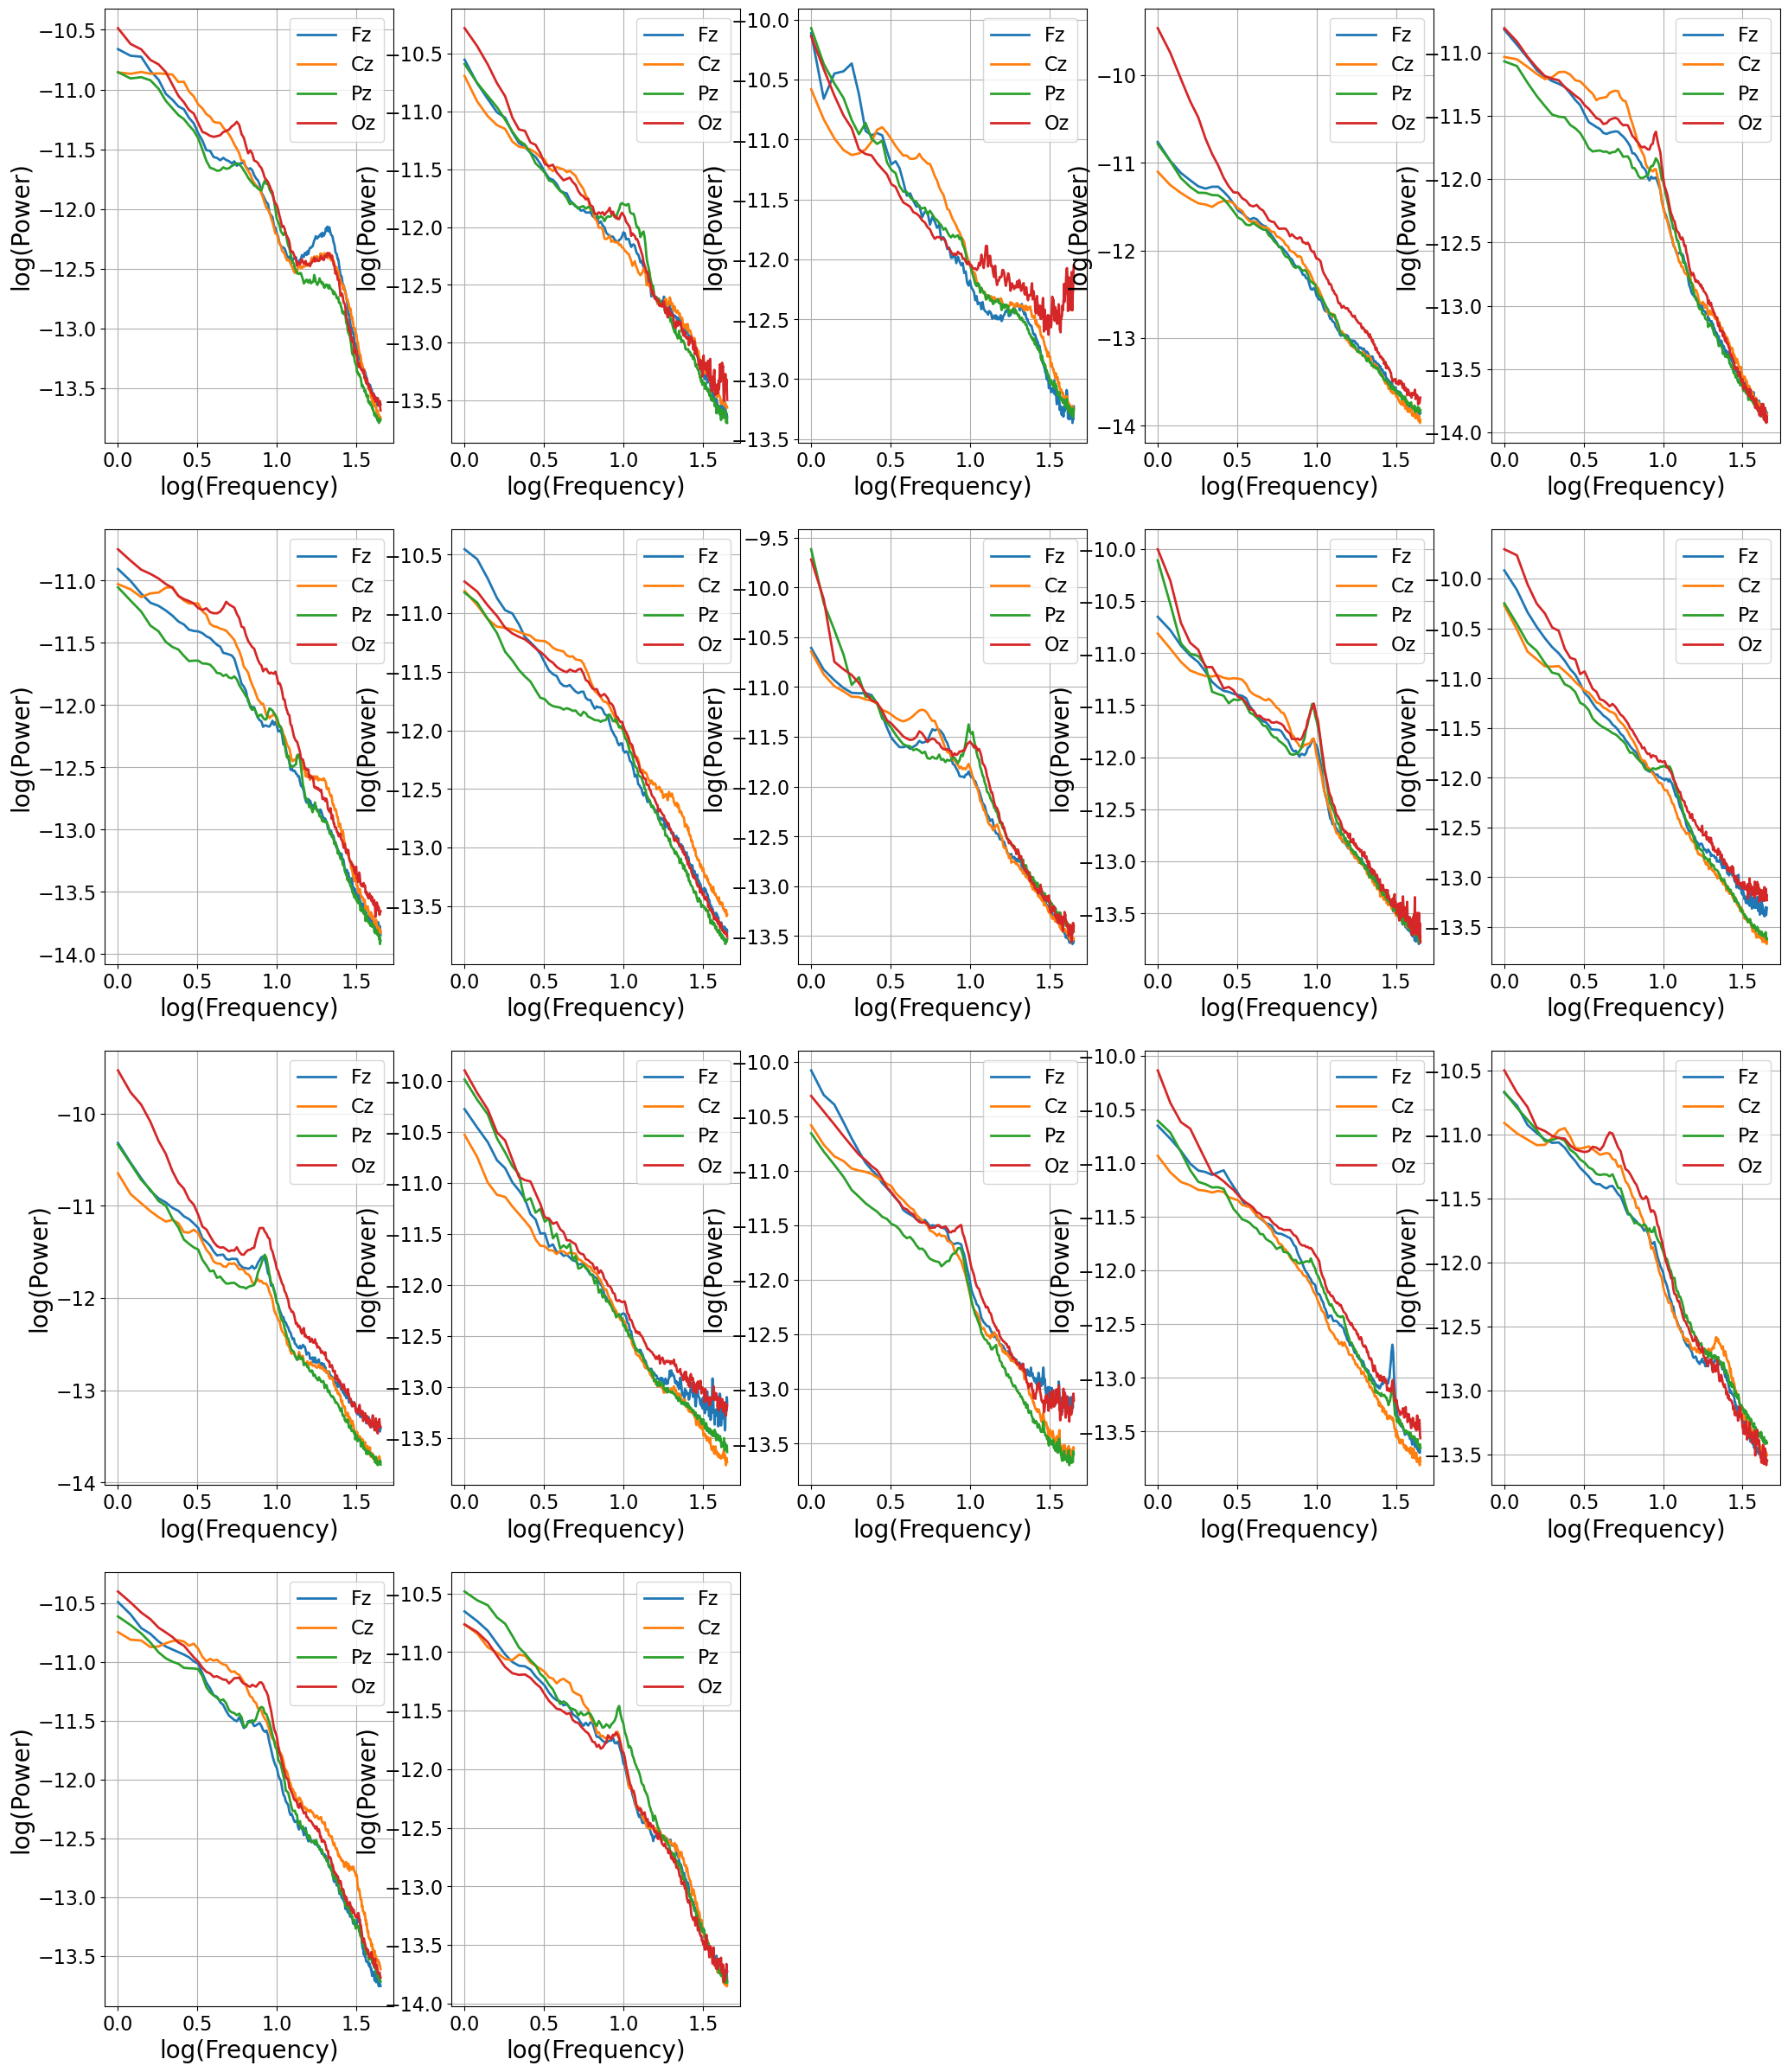

In [32]:
L1_psd={}
L2_psd={}
L3_psd={}
L4_psd={}

F_PARAM = 'F45'
T_PARAM = 'T5'
axes = iter(make_axes(17, 5, figsize=(25, 30)))

path_files = Path('/home/b1044271/Columbia/Results/PSDs/')

freqs_d1 = np.load((path_freqs/(T_PARAM + F_PARAM + '_freqres.npy')))
freqs_d = freqs_d1[4:]
i = 0
for subj in sbj_folders:  
    L1 = np.load(path_files / 'Fz' /os.path.basename(subj) / 'RM'/ (T_PARAM + '_' + F_PARAM + '.npy'))
    L2 = np.load(path_files / 'Cz' /os.path.basename(subj) /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    L3 = np.load(path_files / 'Pz' /os.path.basename(subj) /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    L4 = np.load(path_files / 'Oz' /os.path.basename(subj) /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    
    epoch_no = min([len(L1),len(L2),len(L3),len(L4)])
    
    L1_psd[i] = np.mean(L1[np.random.choice(len(L1), size=epoch_no, replace=False),:],0)
    L2_psd[i] = np.mean(L2[np.random.choice(len(L2), size=epoch_no, replace=False),:],0)
    L3_psd[i] = np.mean(L3[np.random.choice(len(L3), size=epoch_no, replace=False),:],0)
    L4_psd[i] = np.mean(L4[np.random.choice(len(L4), size=epoch_no, replace=False),:],0)
    i = i+1
    
      # mean over all subjects per condition
loc1 = list(iter(L1_psd.values())) #convert values to list
loc2 = list(iter(L2_psd.values())) #convert values to list
loc3 = list(iter(L3_psd.values())) #convert values to list
loc4 = list(iter(L4_psd.values())) #convert values to list
    
for S in np.arange(len(lN1)):

    plot_spectra(freqs_d,[loc1[S],loc2[S],loc3[S],loc4[S]
        ], log_freqs=True, log_powers=True, ax=next(axes), labels=['Fz','Cz','Pz','Oz'])

plt.savefig("/home/b1044271/Columbia/Plots/EEG_Group_PSDs_Locations.svg", dpi = 600 )

In [34]:
WA_m = np.mean(lAW,axis=0)
RM_m = np.mean(lRM,axis=0)
N1_m = np.mean(lN1,axis=0)
N2_m = np.mean(lN2,axis=0)
N3_m = np.mean(lN3,axis=0)

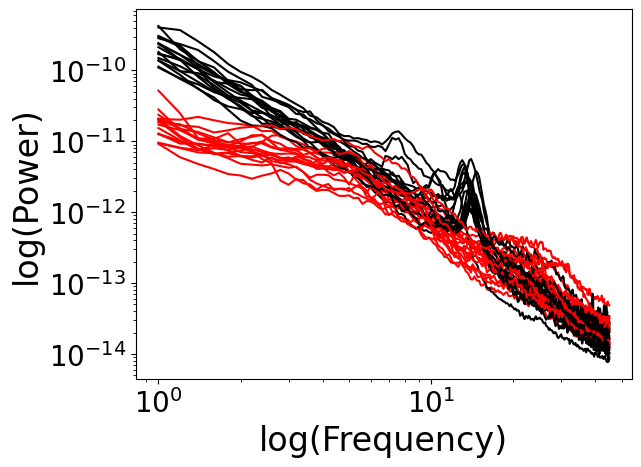

In [37]:
for i in range(17):
    X=lRM[i]
    plt.plot(freqs_d, X, 'r', label = 'REM')
    plt.plot(freqs_d, lN3[i], 'k', label = 'N3')
plt.ylabel('log(Power)', fontsize=24)
plt.xlabel('log(Frequency)', fontsize=24)    
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.legend(fontsize=20)
plt.yscale('log')
plt.xscale('log')

#plt.savefig('/home/b1044271/Single_subj_rem_vs_N3.svg', dpi=600)

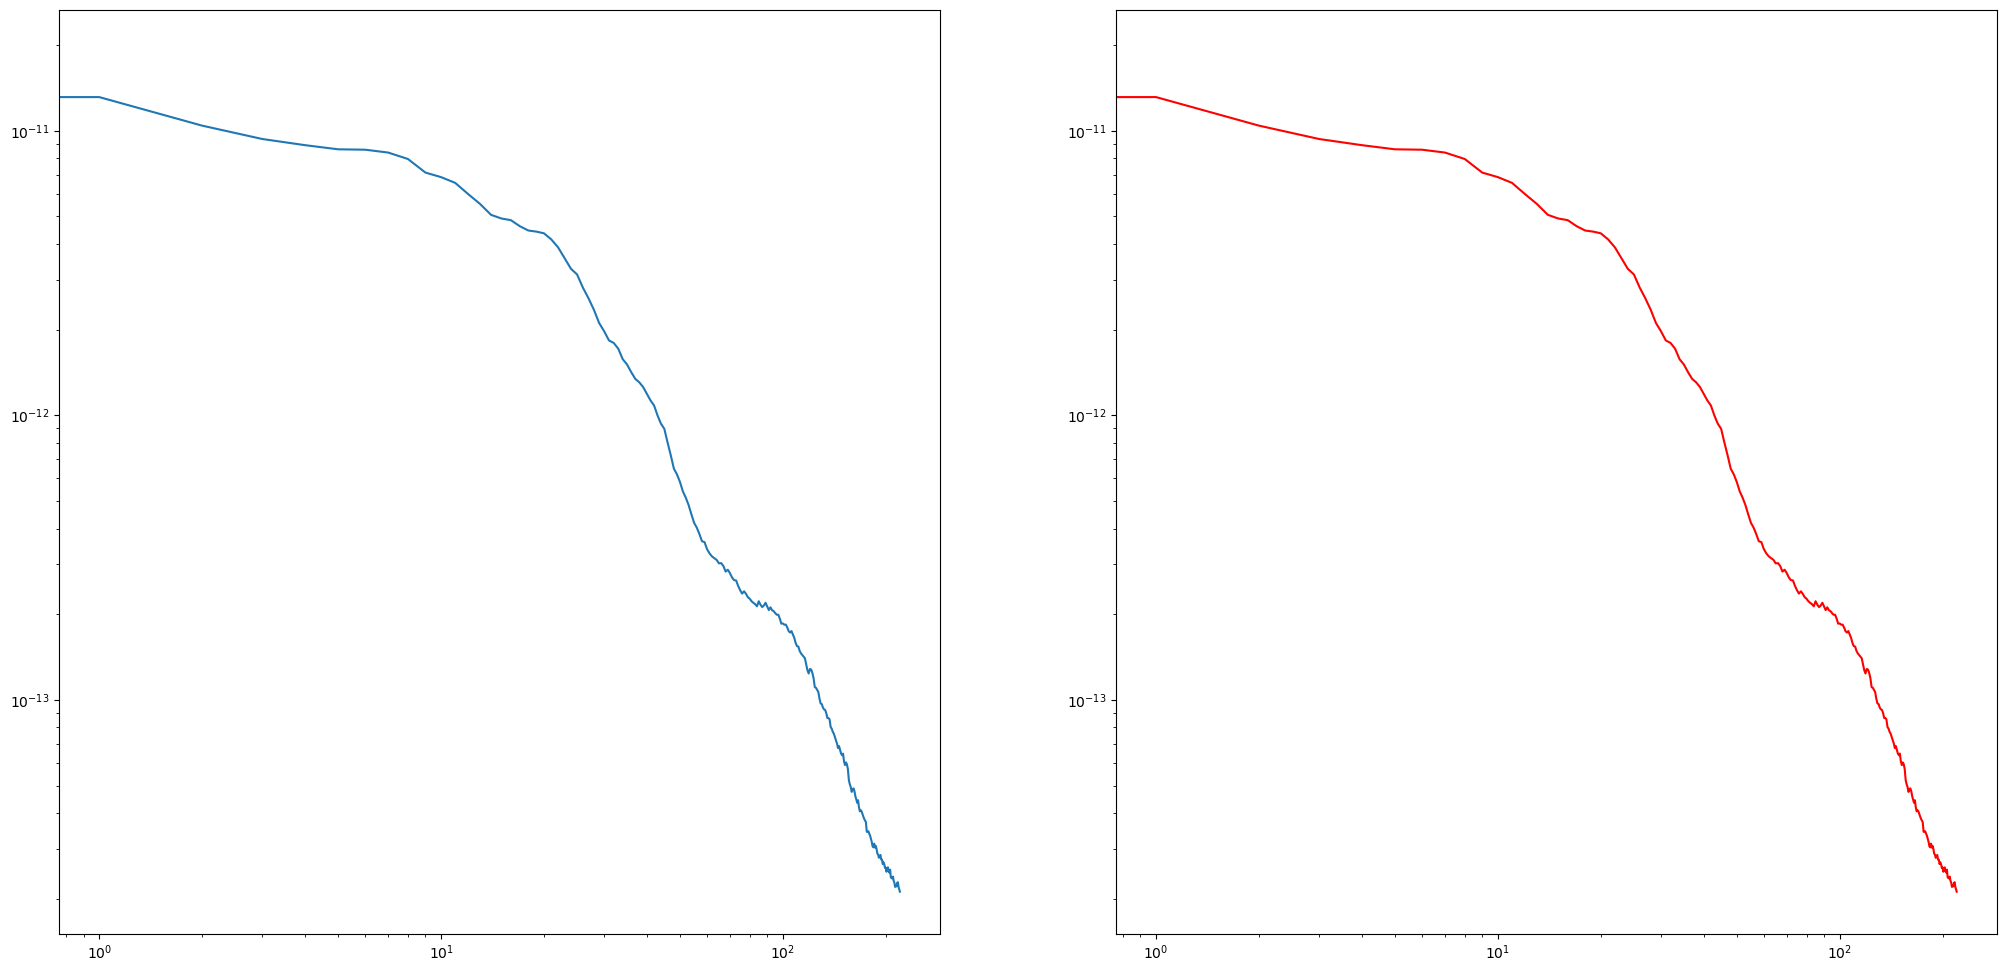

In [40]:
fig = plt.figure(figsize=(25, 12))  
fig.add_subplot(1, 2, 1)

plt.loglog(np.mean(lRM,axis=0))

fig.add_subplot(1, 2, 2)

plt.plot(np.mean(lRM,axis=0), color = 'r')
plt.yscale('log')
plt.xscale('log')